In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [2]:
from math import sqrt
SPINE_COLOR = 'gray'

## Download Data Files

In [ ]:
!wget -O Alignment-1-New.csv "https://drive.google.com/uc?export=download&id=12-UEPiOKH2MsVpVMgftwehQtde2mXU5m" 
!wget -O plot1.csv "https://drive.google.com/uc?export=download&id=1kL0EYfSnl8_qyqfqEGcz4-YPAOzpw4I2" 
!wget -O Al1-stu.csv "https://drive.google.com/uc?export=download&id=1z3kag-wmGHvy0BvoFFzuRxVWVONM2RG9" 

!wget -O plot2.csv "https://drive.google.com/uc?export=download&id=18VUbz7tHI6Ub1ng4kkYEJU-Dr92vTEEY" 
!wget -O Al2-stu.csv "https://drive.google.com/uc?export=download&id=1ToRykRoPhMFabvKZHxWOVi8JjKvUfVdj" 

!wget -O Alignment-3-New.csv "https://drive.google.com/uc?export=download&id=13ZHrkU2fOSJu6nuhFAWZKhmF5AxTyn-v" 
!wget -O plot3.csv "https://drive.google.com/uc?export=download&id=1pO6NHcC01pzBX3yV5NORPBuIloujpb1m" 

In [ ]:
import gdown

file_id = '1hpOAcVpSQGjkaxsY3yeH7CzQZa6Kpgo7'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'Alignment-2-New.csv'

gdown.download(url, output, quiet=False)

In [5]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting."""

    # Width in inches
    if fig_width is None:
        fig_width = 3.39 if columns == 1 else 6.9  # 1 or 2 columns
    if fig_height is None:
        golden_mean = (5**0.5 - 1) / 2  # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches
    MAX_HEIGHT_INCHES = 8
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:", fig_height,
              "so will reduce to", MAX_HEIGHT_INCHES, "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {
        'backend': 'ps',
        'text.latex.preamble': r'\usepackage{gensymb}',
        'axes.labelsize': 5,  # fontsize for x and y labels (was 10)
        'axes.titlesize': 5,
        'font.size': 5,  # was 10
        'legend.fontsize': 5,  # was 10
        'xtick.labelsize': 5,
        'ytick.labelsize': 5,
        'text.usetex': True,
        'figure.figsize': [fig_width, fig_height],
        'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [6]:
%matplotlib inline

In [7]:
latexify(fig_width=7.05826)

## Alignment - 1

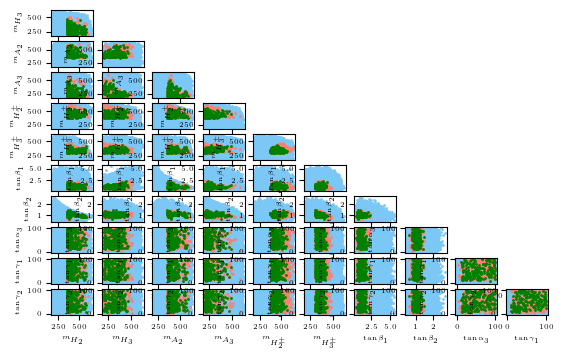

In [8]:
data = pd.read_csv("Alignment-1-New.csv")
data_arr = np.array(data)
data_trunc = data_arr[:,1:12]

data_passed = pd.read_csv("plot1.csv")
data_passed_arr = np.array(data_passed)
data_passed_trunc = data_passed_arr[:,1:12]

data_final = pd.read_csv("Al1-stu.csv")
data_final_arr = np.array(data_final)
data_final_trunc = data_final_arr[:,1:12]

column_names =  [r'$m_{H_2}$',r'$m_{H_3}$',r'$m_{A_2}$',r'$m_{A_3}$',r'$m_{H_2^\pm}$',r'$m_{H_3^\pm}$',r'$\tan \beta_1$',r'$\tan \beta_2$',r'$\tan \alpha_3$',r'$\tan \gamma_1$',r'$\tan \gamma_2$']

# Create a 11x11 grid for subplots
fig, axes = plt.subplots(11, 11)

# Scatter plots on the lower triangle
for i in range(11):
    for j in range(i):
        axes[i, j].scatter(data_trunc[:, j], data_trunc[:, i], s=1, color ='xkcd:lightblue')
        axes[i, j].scatter(data_passed_trunc[:, j], data_passed_trunc[:, i], s=1, color = 'salmon')
        axes[i, j].scatter(data_final_trunc[:, j], data_final_trunc[:, i], s=1, color = 'green')
        axes[i, j].set_xlabel(f'{column_names[j]}')
        axes[i, j].set_ylabel(f'{column_names[i]}')

# Remove empty subplots on the upper triangle/
for i in range(11):
    for j in range(i, 11):
        fig.delaxes(axes[i, j])

# Histograms on the diagonal
#for i in range(11):
#    axes[i, i].hist(data_trunc[:, i], bins=30, color='b', edgecolor='k')
#    axes[i, i].set_xlabel(f'Variable {i+1}')
#    axes[i, i].set_ylabel('Frequency')

# Customize the layout and appearance
#fig.suptitle("Corner Plot", y=1.02)
#fig.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig("alignment-1.pdf", bbox_inches = 'tight', format="pdf", dpi = 50)

# Show the plot
plt.show()

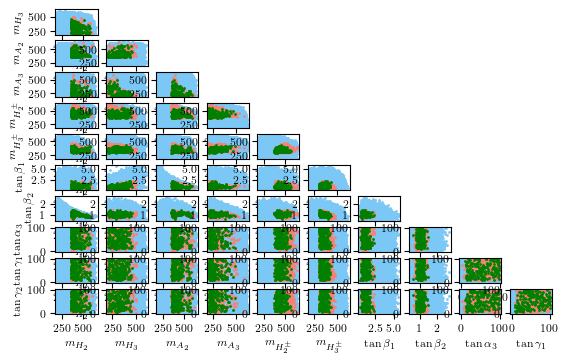

In [8]:
## Removing the x and y labels

data = pd.read_csv("Alignment-1-New.csv")
data_arr = np.array(data)
data_trunc = data_arr[:,1:12]

data_passed = pd.read_csv("plot1.csv")
data_passed_arr = np.array(data_passed)
data_passed_trunc = data_passed_arr[:,1:12]

data_final = pd.read_csv("Al1-stu.csv")
data_final_arr = np.array(data_final)
data_final_trunc = data_final_arr[:,1:12]

column_names =  [r'$m_{H_2}$',r'$m_{H_3}$',r'$m_{A_2}$',r'$m_{A_3}$',r'$m_{H_2^\pm}$',r'$m_{H_3^\pm}$',r'$\tan \beta_1$',r'$\tan \beta_2$',r'$\tan \alpha_3$',r'$\tan \gamma_1$',r'$\tan \gamma_2$']

# Create a 11x11 grid for subplots
fig, axes = plt.subplots(11, 11)

# Scatter plots on the lower triangle
for i in range(11):
    for j in range(i):
        axes[i, j].scatter(data_trunc[:, j], data_trunc[:, i], s=1, color ='xkcd:lightblue')
        axes[i, j].scatter(data_passed_trunc[:, j], data_passed_trunc[:, i], s=1, color = 'salmon')
        axes[i, j].scatter(data_final_trunc[:, j], data_final_trunc[:, i], s=1, color = 'green')
        axes[i, j].set_xlabel(f'{column_names[j]}')
        axes[i, j].set_ylabel(f'{column_names[i]}')

# Remove empty subplots on the upper triangle/
for i in range(11):
    for j in range(i, 11):
        fig.delaxes(axes[i, j])
        
for i in range(11):
    for j in range(11):
        if j > 0 and i < 10:
            axes[i,j].set_xlabel("")
        if j > 0 and j < i:
            axes[i,j].set_ylabel("")

# Histograms on the diagonal
#for i in range(11):
#    axes[i, i].hist(data_trunc[:, i], bins=30, color='b', edgecolor='k')
#    axes[i, i].set_xlabel(f'Variable {i+1}')
#    axes[i, i].set_ylabel('Frequency')

# Customize the layout and appearance
#fig.suptitle("Corner Plot", y=1.02)
#fig.tight_layout(rect=[0, 0, 1, 0.96])

#plt.savefig("alignment-1.pdf", bbox_inches = 'tight', format="pdf")

# Show the plot
plt.show()

## Alignment - 2

In [6]:
data = pd.read_csv("Alignment-2-New.csv")
data_arr = np.array(data)

# Define the columns to remove
columns_to_remove = [1, 9, 12, 13]

# Perform slicing to remove the specified columns
data_trunc = np.delete(data_arr, columns_to_remove, axis=1)

In [7]:
column_names =  [r'$m_{H_1}$',r'$m_{H_3}$',r'$m_{A_2}$',r'$m_{A_3}$',r'$m_{H_2^\pm}$',r'$m_{H_3^\pm}$',r'$\tan \beta_1$',r'$\tan \beta_2$',r'$\tan \gamma_1$',r'$\tan \gamma_2$']

In [8]:
data_passed = pd.read_csv("plot2.csv")
data_passed_arr = np.array(data_passed)

# Define the columns to remove
columns_to_remove = [1, 9, 12, 13, 14, 15, 16]

# Perform slicing to remove the specified columns
data_passed_trunc = np.delete(data_passed_arr, columns_to_remove, axis=1)

In [9]:
data_final = pd.read_csv("Al2-stu.csv")
data_final_arr = np.array(data_final)

# Define the columns to remove
columns_to_remove = [1, 9, 12, 13, 14, 15, 16]

# Perform slicing to remove the specified columns
data_final_trunc = np.delete(data_final_arr, columns_to_remove, axis=1)

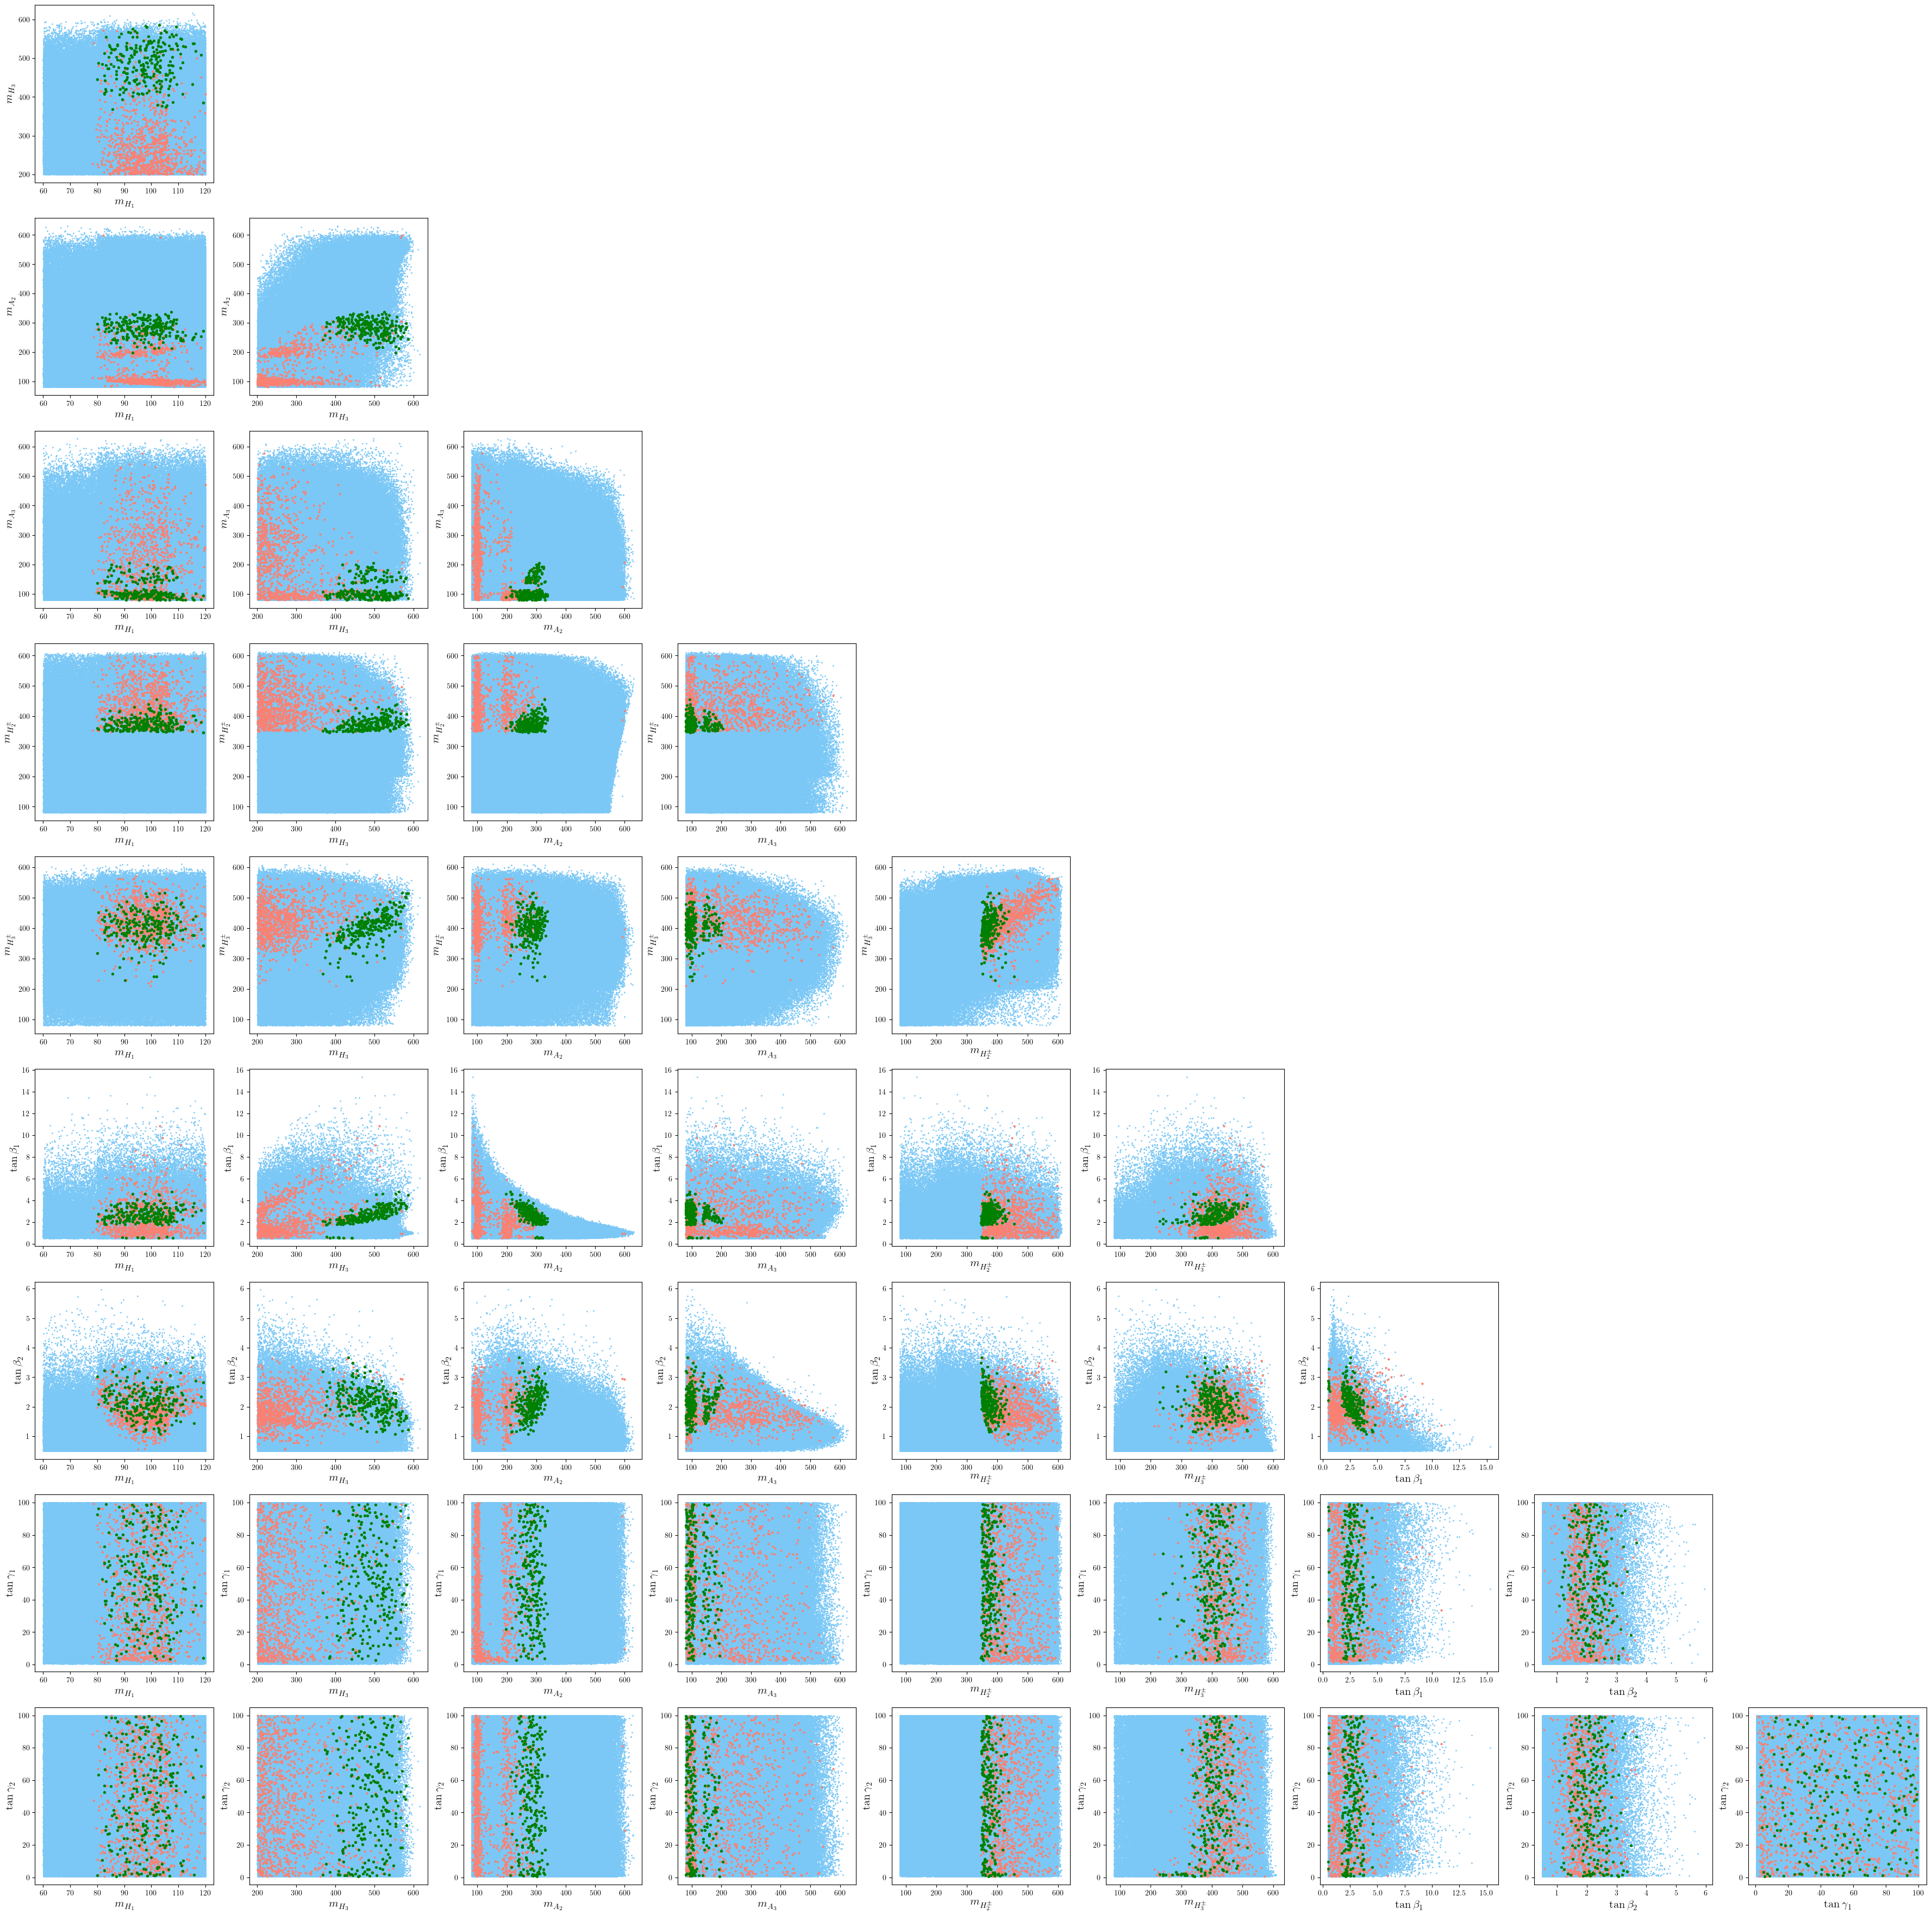

In [10]:
# Create a 11x11 grid for subplots
fig, axes = plt.subplots(10, 10, figsize=(50, 50))

# Scatter plots on the lower triangle
for i in range(10):
    for j in range(i):
        axes[i, j].scatter(data_trunc[:, j], data_trunc[:, i], s=1,  color ='xkcd:lightblue')
        axes[i, j].scatter(data_passed_trunc[:, j], data_passed_trunc[:, i], s=4, color = 'salmon')
        axes[i, j].scatter(data_final_trunc[:, j], data_final_trunc[:, i], s=8, color = 'green')
        axes[i, j].set_xlabel(f'{column_names[j]}')
        axes[i, j].set_ylabel(f'{column_names[i]}')

# Remove empty subplots on the upper triangle/
for i in range(10):
    for j in range(i, 10):
        fig.delaxes(axes[i, j])

# Histograms on the diagonal
#for i in range(11):
#    axes[i, i].hist(data_trunc[:, i], bins=30, color='b', edgecolor='k')
#    axes[i, i].set_xlabel(f'Variable {i+1}')
#    axes[i, i].set_ylabel('Frequency')

# Customize the layout and appearance
#fig.suptitle("Corner Plot", y=1.02)
#fig.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

## Alignment - 3

In [7]:
data = pd.read_csv("Alignment-3-New.csv")
data_arr = np.array(data)

# Define the columns to remove
columns_to_remove = [2, 9, 12, 13]

# Perform slicing to remove the specified columns
data_trunc = np.delete(data_arr, columns_to_remove, axis=1)

In [8]:
column_names =  [r'$m_{H_1}$',r'$m_{H_2}$',r'$m_{A_2}$',r'$m_{A_3}$',r'$m_{H_2^\pm}$',r'$m_{H_3^\pm}$',r'$\tan \beta_1$',r'$\tan \beta_2$',r'$\tan \gamma_1$',r'$\tan \gamma_2$']

In [9]:
data_passed = pd.read_csv("plot3.csv")
data_passed_arr = np.array(data_passed)

# Define the columns to remove
columns_to_remove = [2, 9, 12, 13, 14, 15, 16]

# Perform slicing to remove the specified columns
data_passed_trunc = np.delete(data_passed_arr, columns_to_remove, axis=1)

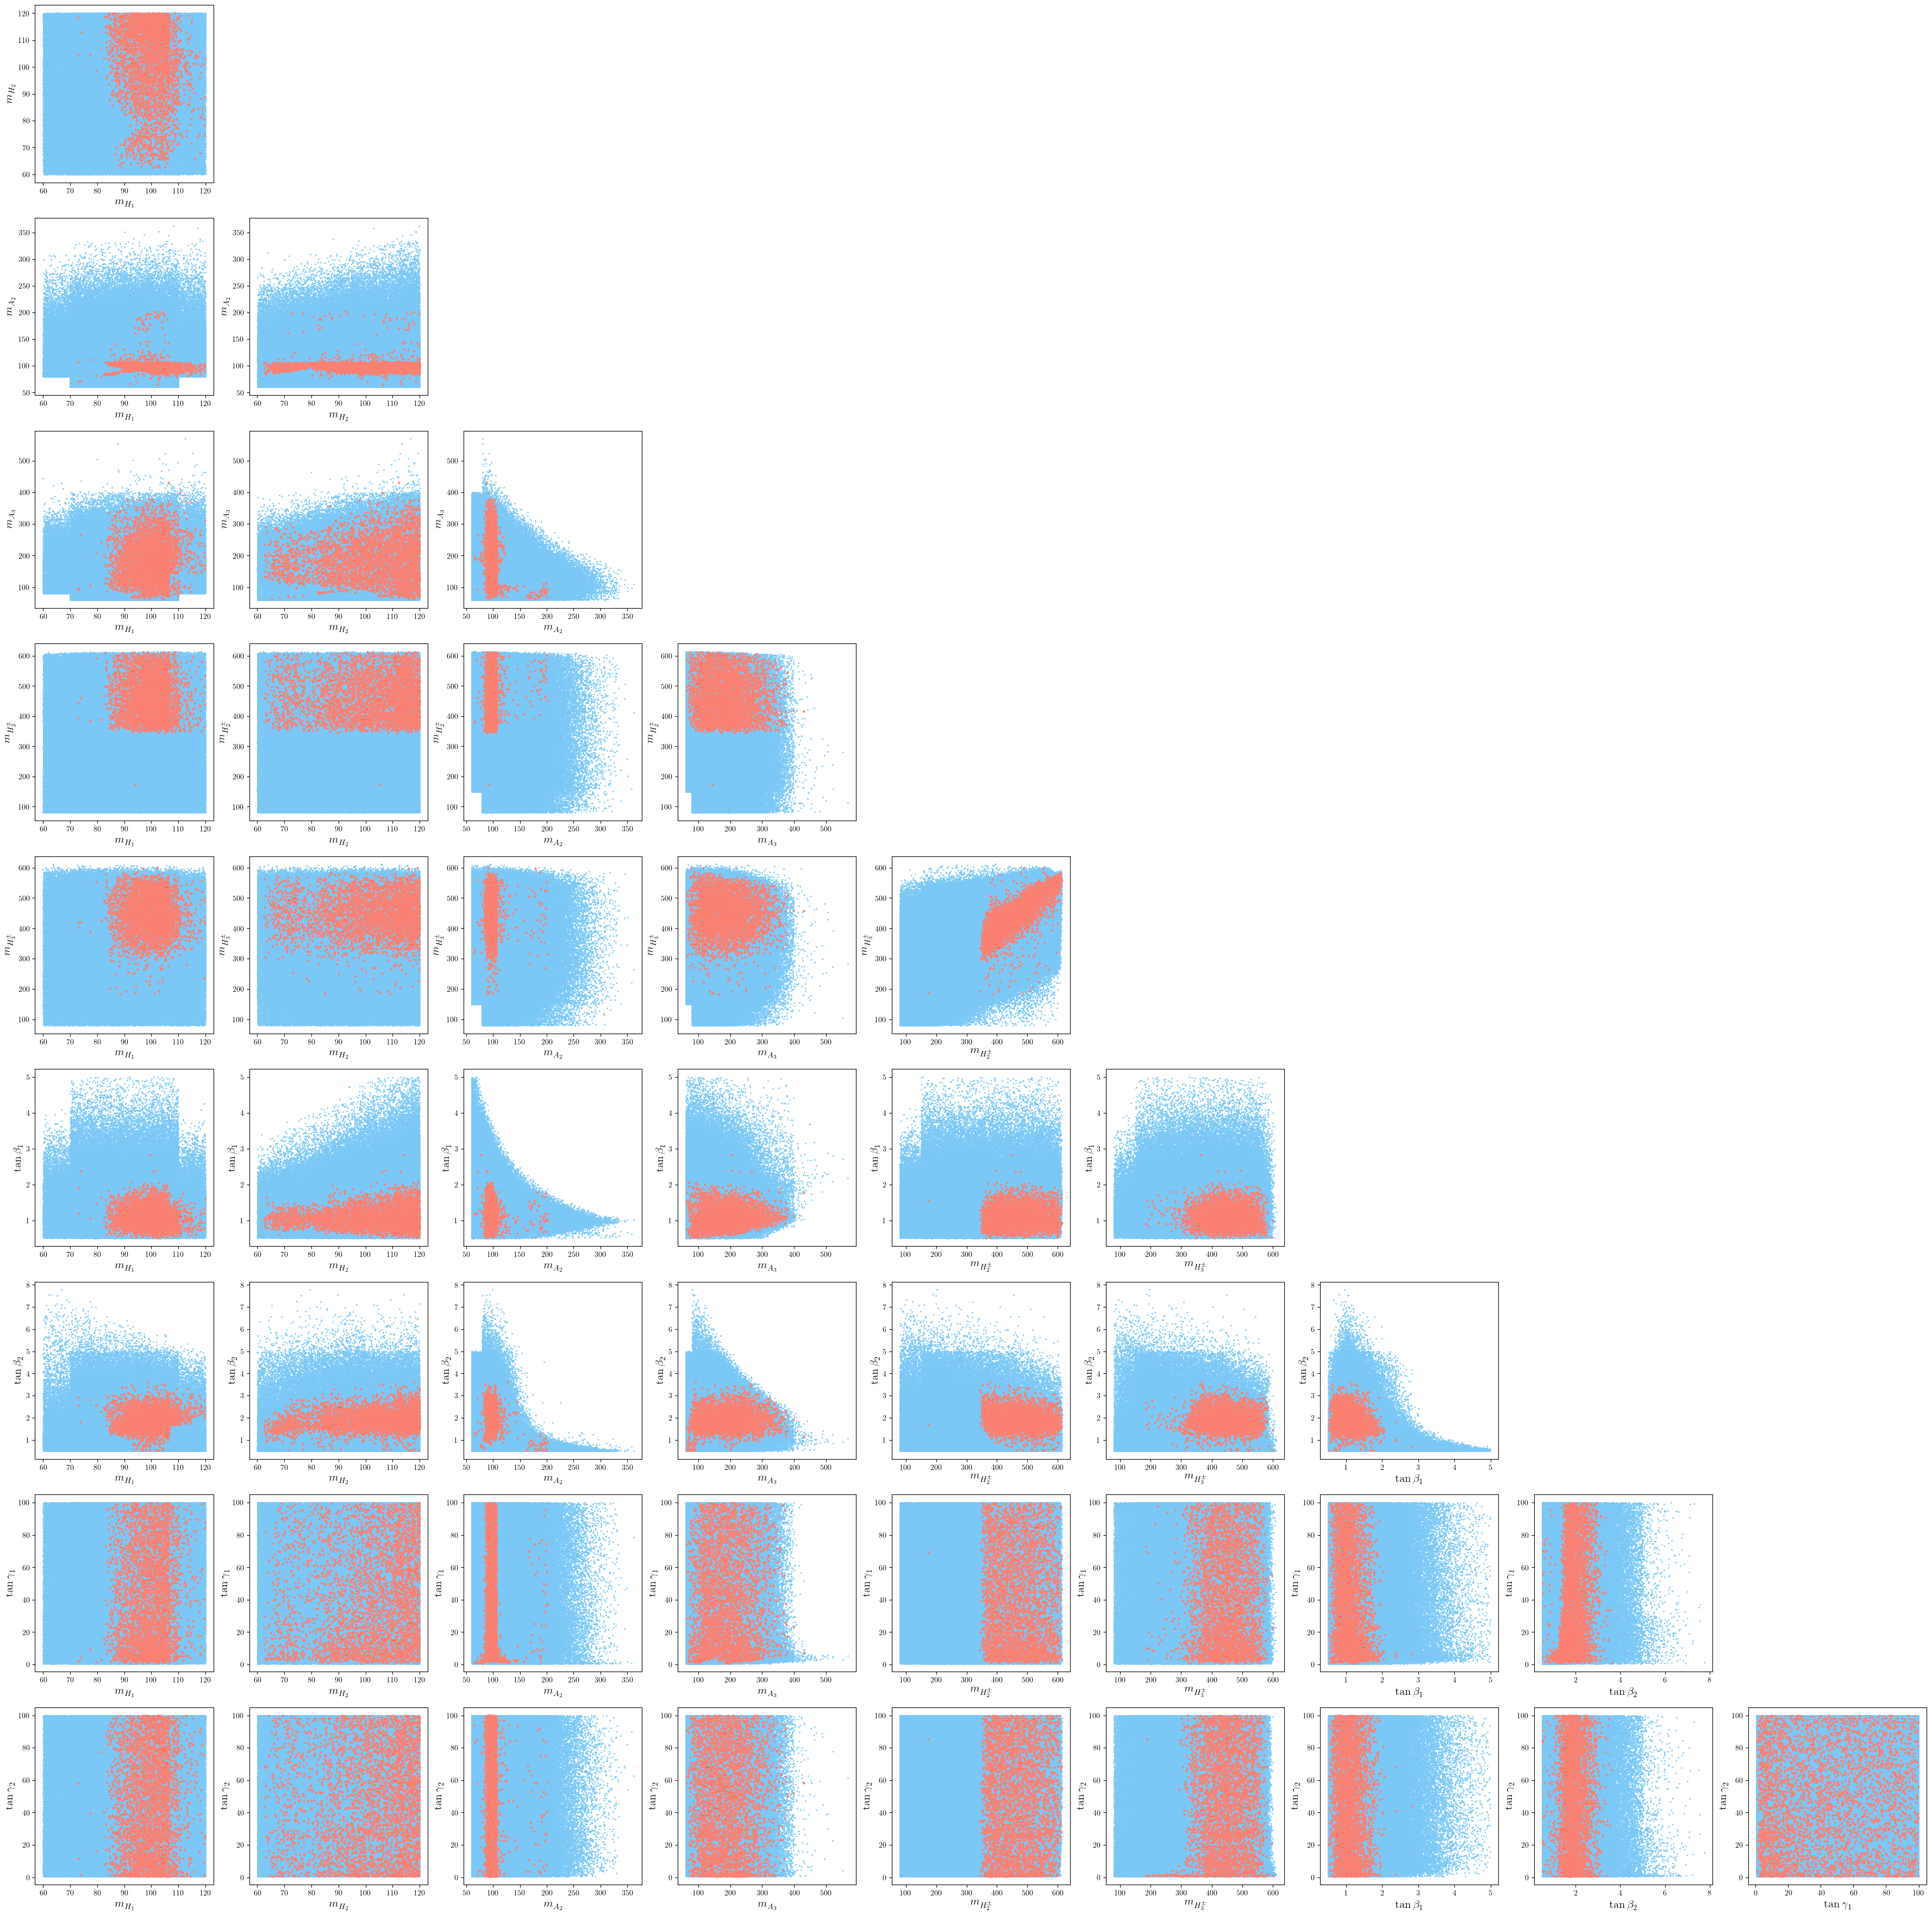

In [10]:
# Create a 11x11 grid for subplots
fig, axes = plt.subplots(10, 10, figsize=(50, 50))

# Scatter plots on the lower triangle
for i in range(10):
    for j in range(i):
        axes[i, j].scatter(data_trunc[:, j], data_trunc[:, i], s=1,  color ='xkcd:lightblue')
        axes[i, j].scatter(data_passed_trunc[:, j], data_passed_trunc[:, i], s=4, color = 'salmon')
        axes[i, j].set_xlabel(f'{column_names[j]}')
        axes[i, j].set_ylabel(f'{column_names[i]}')

# Remove empty subplots on the upper triangle/
for i in range(10):
    for j in range(i, 10):
        fig.delaxes(axes[i, j])

# Histograms on the diagonal
#for i in range(11):
#    axes[i, i].hist(data_trunc[:, i], bins=30, color='b', edgecolor='k')
#    axes[i, i].set_xlabel(f'Variable {i+1}')
#    axes[i, i].set_ylabel('Frequency')

# Customize the layout and appearance
#fig.suptitle("Corner Plot", y=1.02)
#fig.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()